### Recuperando los datos de <i>Ice Cream Avenue </i>

In [1]:
import pandas as pd
import numpy as np 
import datetime
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns

Carga los datos de <i>Ice Cream Avenue</i> que trataste en el lab anterior. Una vez cargados, asegúrate de que aparecen todas las semanas en el DataFrame anterior (no te preocupes si aparecen NAs)

In [2]:
df_ice_cream = pd.read_csv('datos_helados_final.csv')
df_ice_cream.fecha = pd.to_datetime(df_ice_cream.fecha)
df_ice_cream.dtypes
serie_semanal = pd.date_range(start=df_ice_cream.fecha.min() , end=df_ice_cream.fecha.max() , freq='w-mon')

df_helados= df_ice_cream.groupby(pd.Grouper(key='fecha', freq='W-Mon'))

df_helados = df_helados.agg({
    'ventas_unidades':'mean',
    'ventas_euros':'mean',
    'navidad': 'first'
}).reset_index()



### Trabajando con temperaturas

Carga los datos de temperatura y transfórmalos para que tengan periodicidad semanal (comenzando en lunes)

In [3]:
df_temperaturas = pd.read_csv('temperatura_media_diaria-1.csv')
df_temperaturas

,fecha,temp_media
0,2017-05-07,18.338164
1,2017-05-08,18.340669
2,2017-05-09,17.298409
3,2017-05-10,16.508757
4,2017-05-11,15.451730
...,...,...
1413,2021-03-27,11.293095
1414,2021-03-28,12.351978
1415,2021-03-29,13.593142
1416,2021-03-30,14.264296


In [4]:
df_temperaturas = pd.read_csv('temperatura_media_diaria-1.csv')
df_temperaturas.fecha = pd.to_datetime(df_temperaturas.fecha)
df_temperaturas.dtypes
serie_semanal = pd.date_range(start=df_temperaturas.fecha.min() , end=df_temperaturas.fecha.max() , freq='w-mon')

df_nuevo = df_temperaturas.groupby(pd.Grouper(key='fecha', freq='W-Mon')).mean()
df_nuevo.reset_index()

,fecha,temp_media
0,2017-05-08,18.339416
1,2017-05-15,15.607437
2,2017-05-22,11.720259
3,2017-05-29,13.951643
4,2017-06-05,16.005906
...,...,...
200,2021-03-08,11.532948
201,2021-03-15,13.631935
202,2021-03-22,12.179937
203,2021-03-29,10.038249


### Creando el tablón

Combina todos los dataframes en uno solo, partiendo del dataset con los datos de helados agregados por semana. Utiliza left joins.

In [5]:
df_final = df_helados.merge(df_nuevo, how="left", on="fecha")
df_final

,fecha,ventas_unidades,ventas_euros,navidad,temp_media
0,2019-01-07,527.714286,1601.253333,0.0,7.920605
1,2019-01-14,436.000000,1315.160000,0.0,8.765614
2,2019-01-21,421.714286,1295.398333,0.0,6.049170
3,2019-01-28,452.142857,1334.588333,0.0,7.122535
4,2019-02-04,458.714286,1398.610000,0.0,7.097505
...,...,...,...,...,...
99,2020-11-30,592.000000,1578.150000,0.0,9.352862
100,2020-12-07,762.285714,2004.984286,0.0,11.146484
101,2020-12-14,795.142857,2211.254286,1.0,10.067514
102,2020-12-21,836.142857,2257.187143,1.0,8.542340


### Missing values

Explora los missing values o valores perdidos. ¿En qué variables aparecen?

In [6]:
for i in df_final :
    porcentaje = df_final[i].isna().sum()*100/len(df_final[i])
    print(f"El porcentaje de NaN en la columna {i} es de {porcentaje}%") 

El porcentaje de NaN en la columna fecha es de 0.0%
El porcentaje de NaN en la columna ventas_unidades es de 0.9615384615384616%
El porcentaje de NaN en la columna ventas_euros es de 0.9615384615384616%
El porcentaje de NaN en la columna navidad es de 0.9615384615384616%
El porcentaje de NaN en la columna temp_media es de 0.0%


In [7]:
df_final = df_final.dropna()

In [8]:
for i in df_final :
    porcentaje = df_final[i].isna().sum()*100/len(df_final[i])
    print(f"El porcentaje de NaN en la columna {i} es de {porcentaje}%") 

El porcentaje de NaN en la columna fecha es de 0.0%
El porcentaje de NaN en la columna ventas_unidades es de 0.0%
El porcentaje de NaN en la columna ventas_euros es de 0.0%
El porcentaje de NaN en la columna navidad es de 0.0%
El porcentaje de NaN en la columna temp_media es de 0.0%


### Representación gráfica

Representa graficamente la serie de unidades vendidas

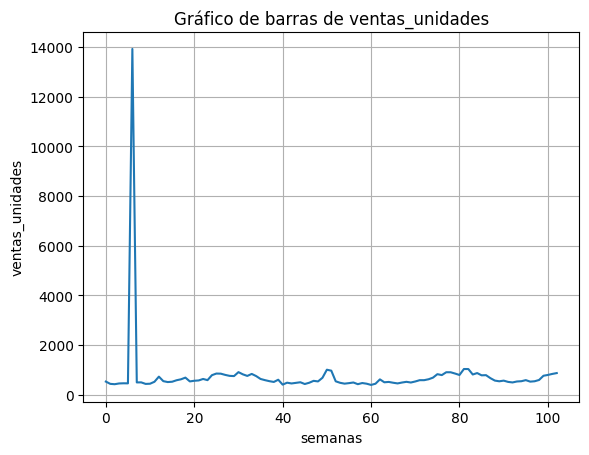

In [9]:
columna_a_graficar = 'ventas_unidades'

# Gráfico de barras
plt.plot(range(len(df_final)), df_final[columna_a_graficar])
plt.xlabel('semanas') 
plt.ylabel(columna_a_graficar) 
plt.title('Gráfico de barras de ventas_unidades')
plt.grid(True)
plt.show()

Representa graficamente las ventas medias en euros del periodo de navidad frente al resto del año. Utiliza un gráfico de barras 

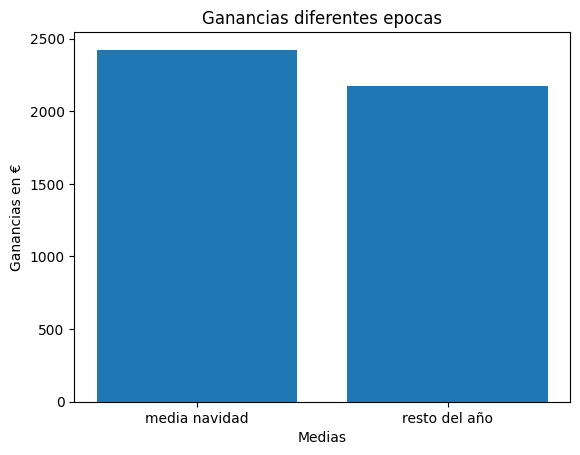

La media de las ganancias de navidad son 2423.6961904761906
La media de las ganancias del resto del año son 2176.8934126984122


In [10]:
navidad = df_final[df_final['navidad']==1]
resto_año = df_final[df_final['navidad']==0] 

media_navidad = navidad["ventas_euros"].mean()
media_resto = resto_año["ventas_euros"].mean()

medias = [media_navidad , media_resto]
labels = ['media navidad' , 'resto del año']

# Gráfico de barras
plt.bar(range(len(medias)), medias , tick_label=labels)
plt.xlabel('Medias') 
plt.ylabel('Ganancias en €') 
plt.title('Ganancias diferentes epocas')
plt.show()

print(f'La media de las ganancias de navidad son {media_navidad}')
print(f'La media de las ganancias del resto del año son {media_resto}')

### Detectando outliers

¿Hay algún outlier en las ventas de helados de tarrina? Señálalos, y argumenta si es un problema de datos, o se puede tratar de un valor real de la serie.

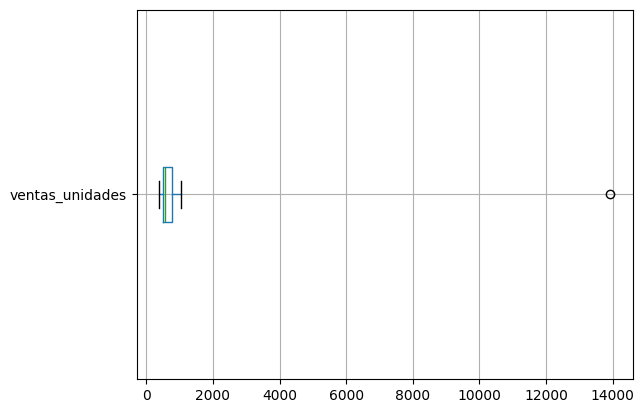

In [11]:
df_final.boxplot(column=['ventas_unidades'], vert=False)
plt.show()

Corrige los outliers que creas necesario, utilizando los métodos que creas más adecuados

In [12]:
Q1 = df_final.quantile(0.25)
Q3 = df_final.quantile(0.75)
IQR = Q3 - Q1

df_final= df_final[~((df_final < (Q1 - 1.5 * IQR)) | (df_final > (Q3 + 1.5 * IQR))).any(axis=1)]


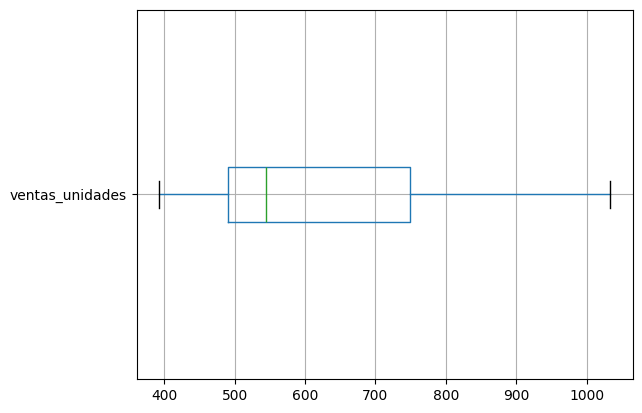

In [13]:
df_final.boxplot(column=['ventas_unidades'], vert=False)
plt.show()

### Analizando las relaciones entre las variables

Calcula las correlaciones entre las variables del dataset, y analiza los resultados obtenidos.

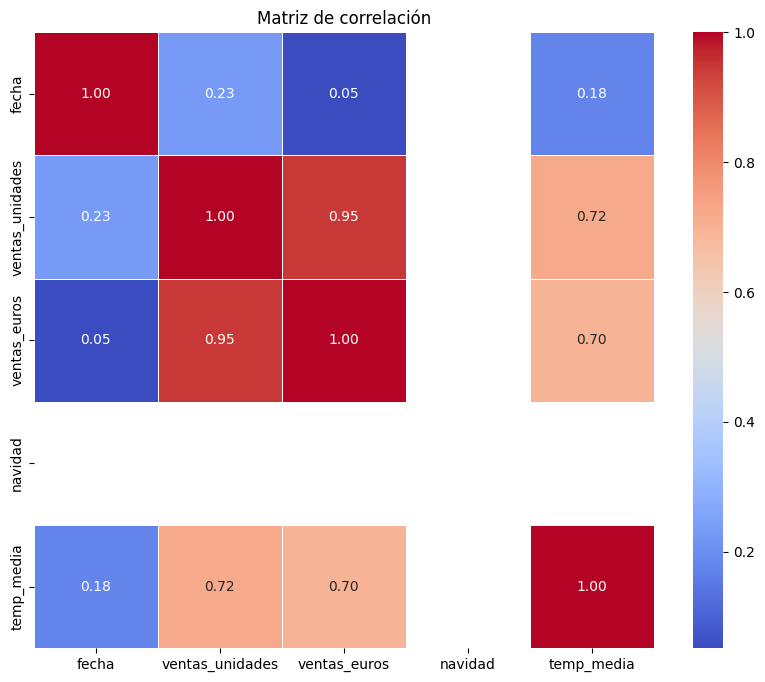

In [14]:
correlation_matrix = df_final.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

- 1 = correlación positiva perfecta.
- -1 = correlación negativa perfecta.
- 0 = no hay correlación.



- Las ventas en unidades y las ventas en euros están correlacionadas entre sí, ya que a más unidades vendidas , más ingresos en euros.
- La temperatura media tiene una correlación positiva con la fecha
- En la variable Fecha encontramos relación positiva con Navidad y temp_media

### Prediciendo las ventas

Entrena un modelo de regresion lineal para explicar las ventas semanales de unidades a partir del resto de variables 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Dividir los datos
X = df_final[['ventas_euros', 'navidad', 'temp_media']]  
y = df_final['ventas_unidades']

# Establecer la semilla para garantizar la reproducibilidad
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

#Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Representa gráficamente la predicción de la regresión y el dato real

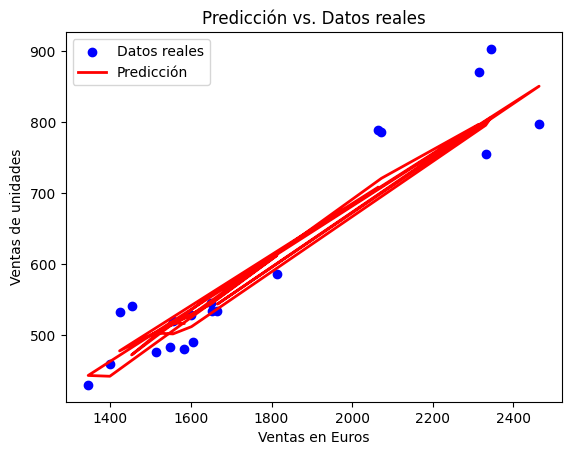

In [16]:
plt.scatter(X_test['ventas_euros'], y_test, color='blue', label='Datos reales')
plt.plot(X_test['ventas_euros'], y_pred, color='red', linewidth=2, label='Predicción')
plt.xlabel('Ventas en Euros')
plt.ylabel('Ventas de unidades')
plt.title('Predicción vs. Datos reales')
plt.legend()
plt.show()